# 아파트_실거래가

### 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [2]:
apt21 = pd.read_csv('data/아파트(전월세)_실거래가_2021.csv', header=15, encoding='cp949')
apt22 = pd.read_csv('data/아파트(전월세)_실거래가_2022.csv', header=15, encoding='cp949')
apt23 = pd.read_csv('data/아파트(전월세)_실거래가_2023.csv', header=15, encoding='cp949')

C:\Users\emily\AppData\Local\Temp\ipykernel_20268\2638666978.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  apt21 = pd.read_csv('data/아파트(전월세)_실거래가_2021.csv', header=15, encoding='cp949')
C:\Users\emily\AppData\Local\Temp\ipykernel_20268\2638666978.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  apt22 = pd.read_csv('data/아파트(전월세)_실거래가_2022.csv', header=15, encoding='cp949')


In [3]:
apt21_deal = pd.read_csv('data/아파트(매매)_실거래가_2021.csv', header=15, encoding='cp949')
apt22_deal = pd.read_csv('data/아파트(매매)_실거래가_2022.csv', header=15, encoding='cp949')
apt23_deal = pd.read_csv('data/아파트(매매)_실거래가_2023.csv', header=15, encoding='cp949')

### 전처리

In [33]:
apt21_df = apt21[apt21['전월세구분']=='전세']
apt22_df = apt22[apt22['전월세구분']=='전세']
apt23_df = apt23[apt23['전월세구분']=='전세']

In [36]:
apt21_dea1_df = apt21[apt21['전월세구분']=='전세']
apt22_deal_df = apt22[apt22['전월세구분']=='전세']
apt23_deal_df = apt23[apt23['전월세구분']=='전세']

In [5]:
apt21['보증금(만원)'] = apt21['보증금(만원)'].str.replace(',', '').astype(int)
apt21['월세금(만원)'] = apt21['월세금(만원)'].str.replace(',', '').astype(int)

In [6]:
apt21_deal['거래금액(만원)'] = apt21_deal['거래금액(만원)'].str.replace(',', '').astype(int)
apt22_deal['거래금액(만원)'] = apt22_deal['거래금액(만원)'].str.replace(',', '').astype(int)
apt23_deal['거래금액(만원)'] = apt23_deal['거래금액(만원)'].str.replace(',', '').astype(int)

In [37]:
apt21_deal.describe()

,NO,본번,부번,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도
count,43390.000000,43390.000000,43390.000000,43390.000000,43390.000000,43390.000000,4.339000e+04,43390.000000,43390.000000
mean,21695.500000,593.198248,8.525190,73.512272,202105.421318,15.655520,1.026945e+05,9.152662,2001.850288
std,12525.758427,539.989475,63.749218,33.013821,3.089755,8.780965,7.507025e+04,6.256527,10.388964
min,1.000000,1.000000,0.000000,10.156000,202101.000000,1.000000,6.600000e+03,-1.000000,1961.000000
25%,10848.250000,205.000000,0.000000,58.140000,202103.000000,8.000000,5.880000e+04,4.000000,1995.000000
50%,21695.500000,492.000000,0.000000,70.645000,202105.000000,16.000000,8.470000e+04,8.000000,2002.000000
75%,32542.750000,810.000000,1.000000,84.950000,202108.000000,23.000000,1.275000e+05,13.000000,2009.000000
max,43390.000000,4969.000000,2837.000000,317.360000,202112.000000,31.000000,1.200000e+06,66.000000,2022.000000


In [38]:
apt21_deal['거래금액(만원)'].describe()

count    4.339000e+04
mean     1.026945e+05
std      7.507025e+04
min      6.600000e+03
25%      5.880000e+04
50%      8.470000e+04
75%      1.275000e+05
max      1.200000e+06
Name: 거래금액(만원), dtype: float64

In [39]:
apt22_deal['거래금액(만원)'].describe()

count    1.279900e+04
mean     9.715524e+04
std      9.462162e+04
min      6.700000e+03
25%      3.900000e+04
50%      7.400000e+04
75%      1.200000e+05
max      1.450000e+06
Name: 거래금액(만원), dtype: float64

In [40]:
apt23_deal['거래금액(만원)'].describe()

count    3.565800e+04
mean     1.064337e+05
std      7.797207e+04
min      7.400000e+03
25%      6.000000e+04
50%      8.700000e+04
75%      1.295000e+05
max      1.800000e+06
Name: 거래금액(만원), dtype: float64

- 21년 거래 건수: 43,390건  /  평균 거래가 : 102,694.5만원 (10.3억 원)
- 22년 거래 건수: 12,799건  /  평균 거래가 : 97,155만원 (약 9.7억 원)
- 23년 거래 건수: 35,658건  /  평균 거래가 : 106,433만원 (약 10.6억)

In [43]:
apt21_df.isnull().sum()

NO                   0
시군구                  0
번지                   0
본번                   0
부번                   0
단지명                  0
전월세구분                0
전용면적(㎡)              0
계약년월                 0
계약일                  0
보증금(만원)              0
월세금(만원)              0
층                    0
건축년도                 0
도로명                  0
계약기간                 0
계약구분                 0
갱신요구권 사용             0
종전계약 보증금(만원)    108766
종전계약 월세(만원)     108766
주택유형                 0
dtype: int64

In [48]:
apt21_df['종전계약 보증금(만원)'].value_counts()

40,000    1092
50,000     868
45,000     852
35,000     792
30,000     733
          ... 
60,200       1
8,700        1
54,900       1
47,300       1
53,700       1
Name: 종전계약 보증금(만원), Length: 671, dtype: int64

<Axes: >

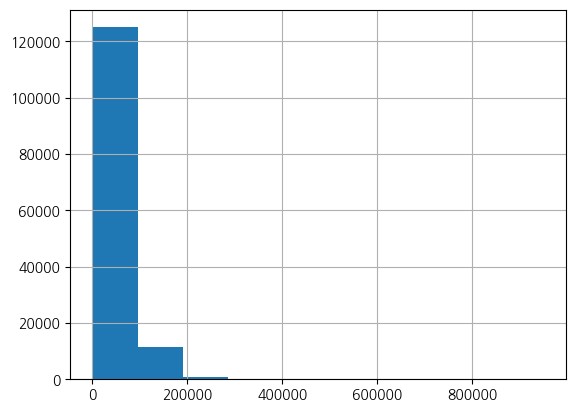

In [46]:
apt21_df['보증금(만원)'].hist()